In [1]:
import matplotlib.pyplot as plt
import cv2
import numpy as np
from PIL import Image
from google.colab import files

# Subir imagen
uploaded = files.upload()

Saving depositphotos_458074174-stock-photo-march-2021-display-baby-yoda.jpg to depositphotos_458074174-stock-photo-march-2021-display-baby-yoda.jpg


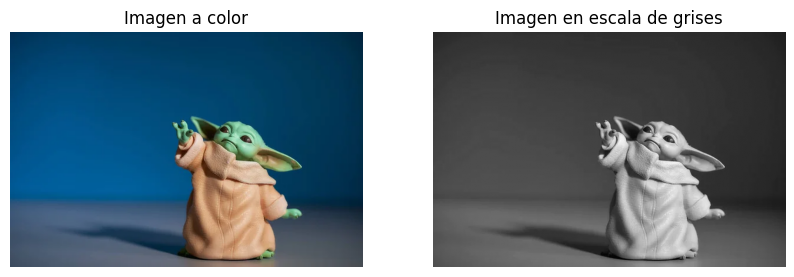

In [8]:
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image

# Cargar imagen (suponemos que solo se subió una)
for file_name in uploaded.keys():
    # Abrir imagen a color
    img_color = Image.open(file_name)

    # Convertir a escala de grises
    img_gray_pil = img_color.convert("L")

    # Convertir a NumPy array de tipo float32
    img_gray = np.array(img_gray_pil, dtype=np.float32)

    # Mostrar imágenes
    plt.figure(figsize=(10, 5))

    plt.subplot(1, 2, 1)
    plt.title("Imagen a color")
    plt.imshow(img_color)
    plt.axis("off")

    plt.subplot(1, 2, 2)
    plt.title("Imagen en escala de grises")
    plt.imshow(img_gray, cmap='gray')
    plt.axis("off")
    plt.show()


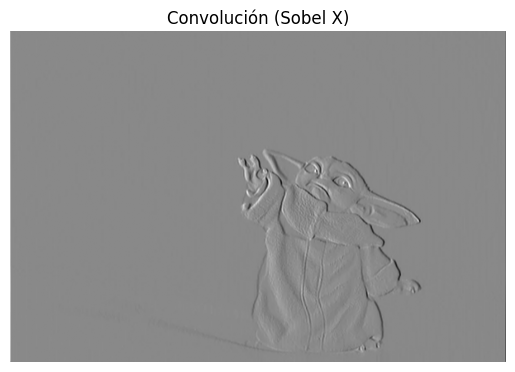

In [10]:
    # Función de convolución 2D manual
    def aplicar_convolucion(imagen, kernel):
        altura, ancho = imagen.shape
        k_altura, k_ancho = kernel.shape
        pad_y = k_altura // 2
        pad_x = k_ancho // 2

        # Padding con ceros
        imagen_padded = np.pad(imagen, ((pad_y, pad_y), (pad_x, pad_x)), mode='constant', constant_values=0)
        resultado = np.zeros_like(imagen)

        for y in range(altura):
            for x in range(ancho):
                region = imagen_padded[y:y + k_altura, x:x + k_ancho]
                resultado[y, x] = np.sum(region * kernel)

        return resultado

    # Kernel de ejemplo (Sobel horizontal)
    kernel_sobel_x = np.array([
        [-1, 0, 1],
        [-2, 0, 2],
        [-1, 0, 1]
    ], dtype=np.float32)

    # Aplicar convolución
    resultado = aplicar_convolucion(img_gray, kernel_sobel_x)

    plt.subplot(1, 1, 1)
    plt.title("Convolución (Sobel X)")
    plt.imshow(resultado, cmap='gray')
    plt.axis('off')
    plt.show()


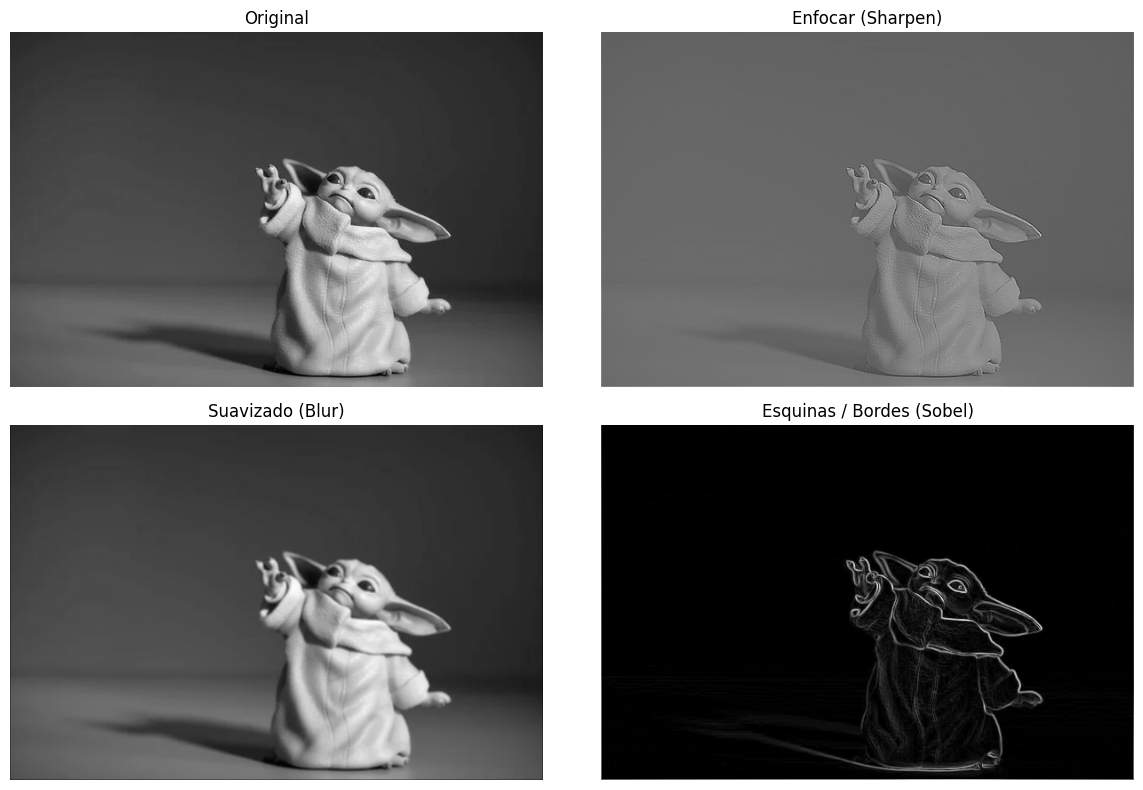

In [11]:
# Asegurarse de que img_gray sea un array NumPy
img_gray = np.array(img_gray, dtype=np.float32)

# Función de convolución 2D manual
def aplicar_convolucion(imagen, kernel):
    altura, ancho = imagen.shape
    k_altura, k_ancho = kernel.shape
    pad_y = k_altura // 2
    pad_x = k_ancho // 2

    imagen_padded = np.pad(imagen, ((pad_y, pad_y), (pad_x, pad_x)), mode='constant')
    resultado = np.zeros_like(imagen)

    for y in range(altura):
        for x in range(ancho):
            region = imagen_padded[y:y + k_altura, x:x + k_ancho]
            resultado[y, x] = np.sum(region * kernel)

    return resultado

# 1. Kernel de Enfoque (Sharpen)
kernel_sharpen = np.array([
    [ 0, -1,  0],
    [-1,  5, -1],
    [ 0, -1,  0]
], dtype=np.float32)

# 2. Kernel de Suavizado (Blur Promedio)
kernel_blur = np.ones((3, 3), dtype=np.float32) / 9.0

# 3. Detección de esquinas (combinación de Sobel X e Y)
kernel_sobel_x = np.array([
    [-1, 0, 1],
    [-2, 0, 2],
    [-1, 0, 1]
], dtype=np.float32)

kernel_sobel_y = np.array([
    [-1, -2, -1],
    [ 0,  0,  0],
    [ 1,  2,  1]
], dtype=np.float32)

# --- Aplicar kernels ---
img_sharpen = aplicar_convolucion(img_gray, kernel_sharpen)
img_blur = aplicar_convolucion(img_gray, kernel_blur)

# Para esquinas: combinar Sobel X e Y
grad_x = aplicar_convolucion(img_gray, kernel_sobel_x)
grad_y = aplicar_convolucion(img_gray, kernel_sobel_y)
img_edges = np.sqrt(grad_x**2 + grad_y**2)  # Magnitud del gradiente

# Resultados
plt.figure(figsize=(12, 8))

plt.subplot(2, 2, 1)
plt.title("Original")
plt.imshow(img_gray, cmap='gray')
plt.axis('off')

plt.subplot(2, 2, 2)
plt.title("Enfocar (Sharpen)")
plt.imshow(img_sharpen, cmap='gray')
plt.axis('off')

plt.subplot(2, 2, 3)
plt.title("Suavizado (Blur)")
plt.imshow(img_blur, cmap='gray')
plt.axis('off')

plt.subplot(2, 2, 4)
plt.title("Esquinas / Bordes (Sobel)")
plt.imshow(img_edges, cmap='gray')
plt.axis('off')

plt.tight_layout()
plt.show()

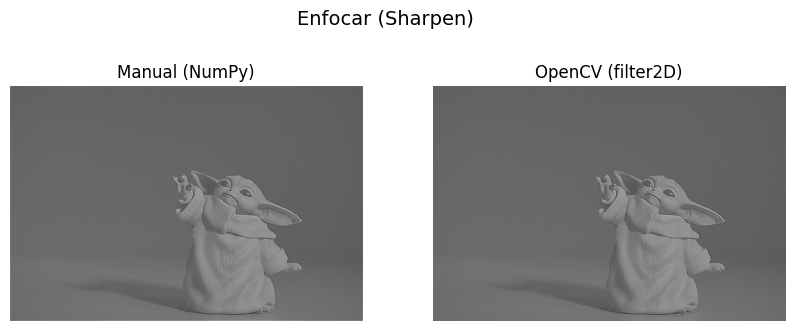

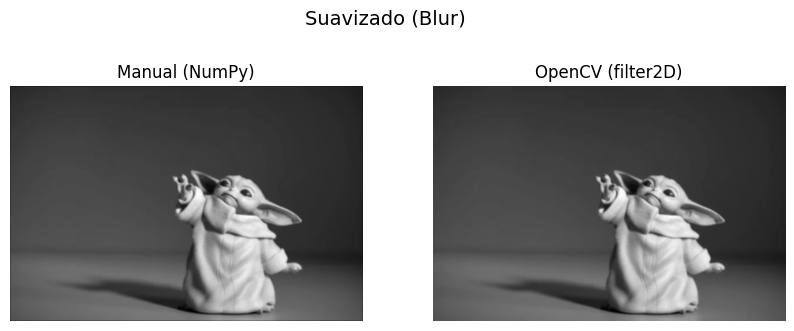

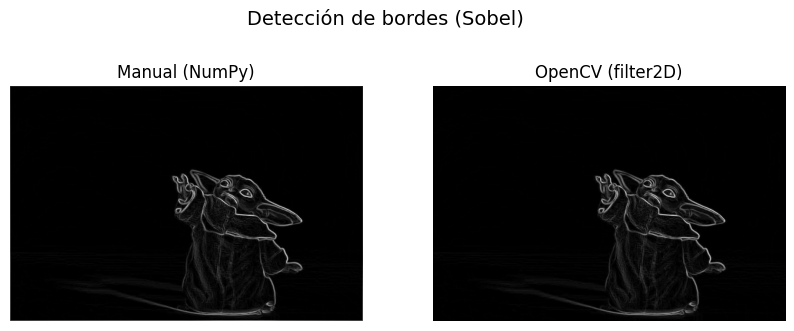

In [12]:

# Función manual de convolución
def aplicar_convolucion(imagen, kernel):
    altura, ancho = imagen.shape
    k_altura, k_ancho = kernel.shape
    pad_y = k_altura // 2
    pad_x = k_ancho // 2

    imagen_padded = np.pad(imagen, ((pad_y, pad_y), (pad_x, pad_x)), mode='constant')
    resultado = np.zeros_like(imagen)

    for y in range(altura):
        for x in range(ancho):
            region = imagen_padded[y:y + k_altura, x:x + k_ancho]
            resultado[y, x] = np.sum(region * kernel)

    return resultado

# Definir los kernels
kernel_sharpen = np.array([[ 0, -1,  0], [-1,  5, -1], [ 0, -1,  0]], dtype=np.float32)
kernel_blur = np.ones((3, 3), dtype=np.float32) / 9.0
kernel_sobel_x = np.array([[-1, 0, 1], [-2, 0, 2], [-1, 0, 1]], dtype=np.float32)
kernel_sobel_y = np.array([[-1, -2, -1], [0, 0, 0], [1, 2, 1]], dtype=np.float32)

# Aplicación manual
img_sharpen_manual = aplicar_convolucion(img_gray, kernel_sharpen)
img_blur_manual = aplicar_convolucion(img_gray, kernel_blur)
grad_x = aplicar_convolucion(img_gray, kernel_sobel_x)
grad_y = aplicar_convolucion(img_gray, kernel_sobel_y)
img_sobel_manual = np.sqrt(grad_x**2 + grad_y**2)

# Aplicación con OpenCV (usa cv2.CV_32F para mantener consistencia)
img_sharpen_cv = cv2.filter2D(img_gray, ddepth=cv2.CV_32F, kernel=kernel_sharpen)
img_blur_cv = cv2.filter2D(img_gray, ddepth=cv2.CV_32F, kernel=kernel_blur)
grad_x_cv = cv2.filter2D(img_gray, ddepth=cv2.CV_32F, kernel=kernel_sobel_x)
grad_y_cv = cv2.filter2D(img_gray, ddepth=cv2.CV_32F, kernel=kernel_sobel_y)
img_sobel_cv = np.sqrt(grad_x_cv**2 + grad_y_cv**2)

# Mostrar comparación
def mostrar_comparacion(titulo, manual, cv):
    plt.figure(figsize=(10, 4))
    plt.suptitle(titulo, fontsize=14)

    plt.subplot(1, 2, 1)
    plt.title("Manual (NumPy)")
    plt.imshow(manual, cmap='gray')
    plt.axis('off')

    plt.subplot(1, 2, 2)
    plt.title("OpenCV (filter2D)")
    plt.imshow(cv, cmap='gray')
    plt.axis('off')

    plt.show()

mostrar_comparacion("Enfocar (Sharpen)", img_sharpen_manual, img_sharpen_cv)
mostrar_comparacion("Suavizado (Blur)", img_blur_manual, img_blur_cv)
mostrar_comparacion("Detección de bordes (Sobel)", img_sobel_manual, img_sobel_cv)
